In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML
import cv2
    

In [1]:

student_id = input("Enter your student id")
student_name = input("Enter your name")
print("STUDENT ID", student_id)
print("STUDENT NAME", student_name)


STUDENT ID 61275029H
STUDENT NAME 丁柏丞 kevin


<!-- <div class="question_frame"> --><!-- start of question_frame -->



<h1>Map Navigation - Setup</h1>
<div class="question_body">

<p>Given is a set of cities with the coordinates as shown below</p>

<code>
map_points = [[20,30],[80,10],[50,50],[40,20],[50,50],[20,60],[20,50],[60,70],[80,20],[10,70],[80,40]]
</code>

<p>The cities are connected through the following set of roads. Each entry in the road network
shows the index of start and end city that are connected by this road</p>
<code>
map_roads = [[5,9],[3,6],[1,6],[1,3],[6,7],[5,7],[1,2],[7,8],[3,4],[3,9],[3,5],[3,8],[1,4],[5,8],[3,7],[6,8],[1,9],[1,5],[0,2],[0,6],[4,7],[8,9]]
</code>

<p>A map of the navigation problem is shown in the figure below.</p>


<a download="Navigation Domain" href="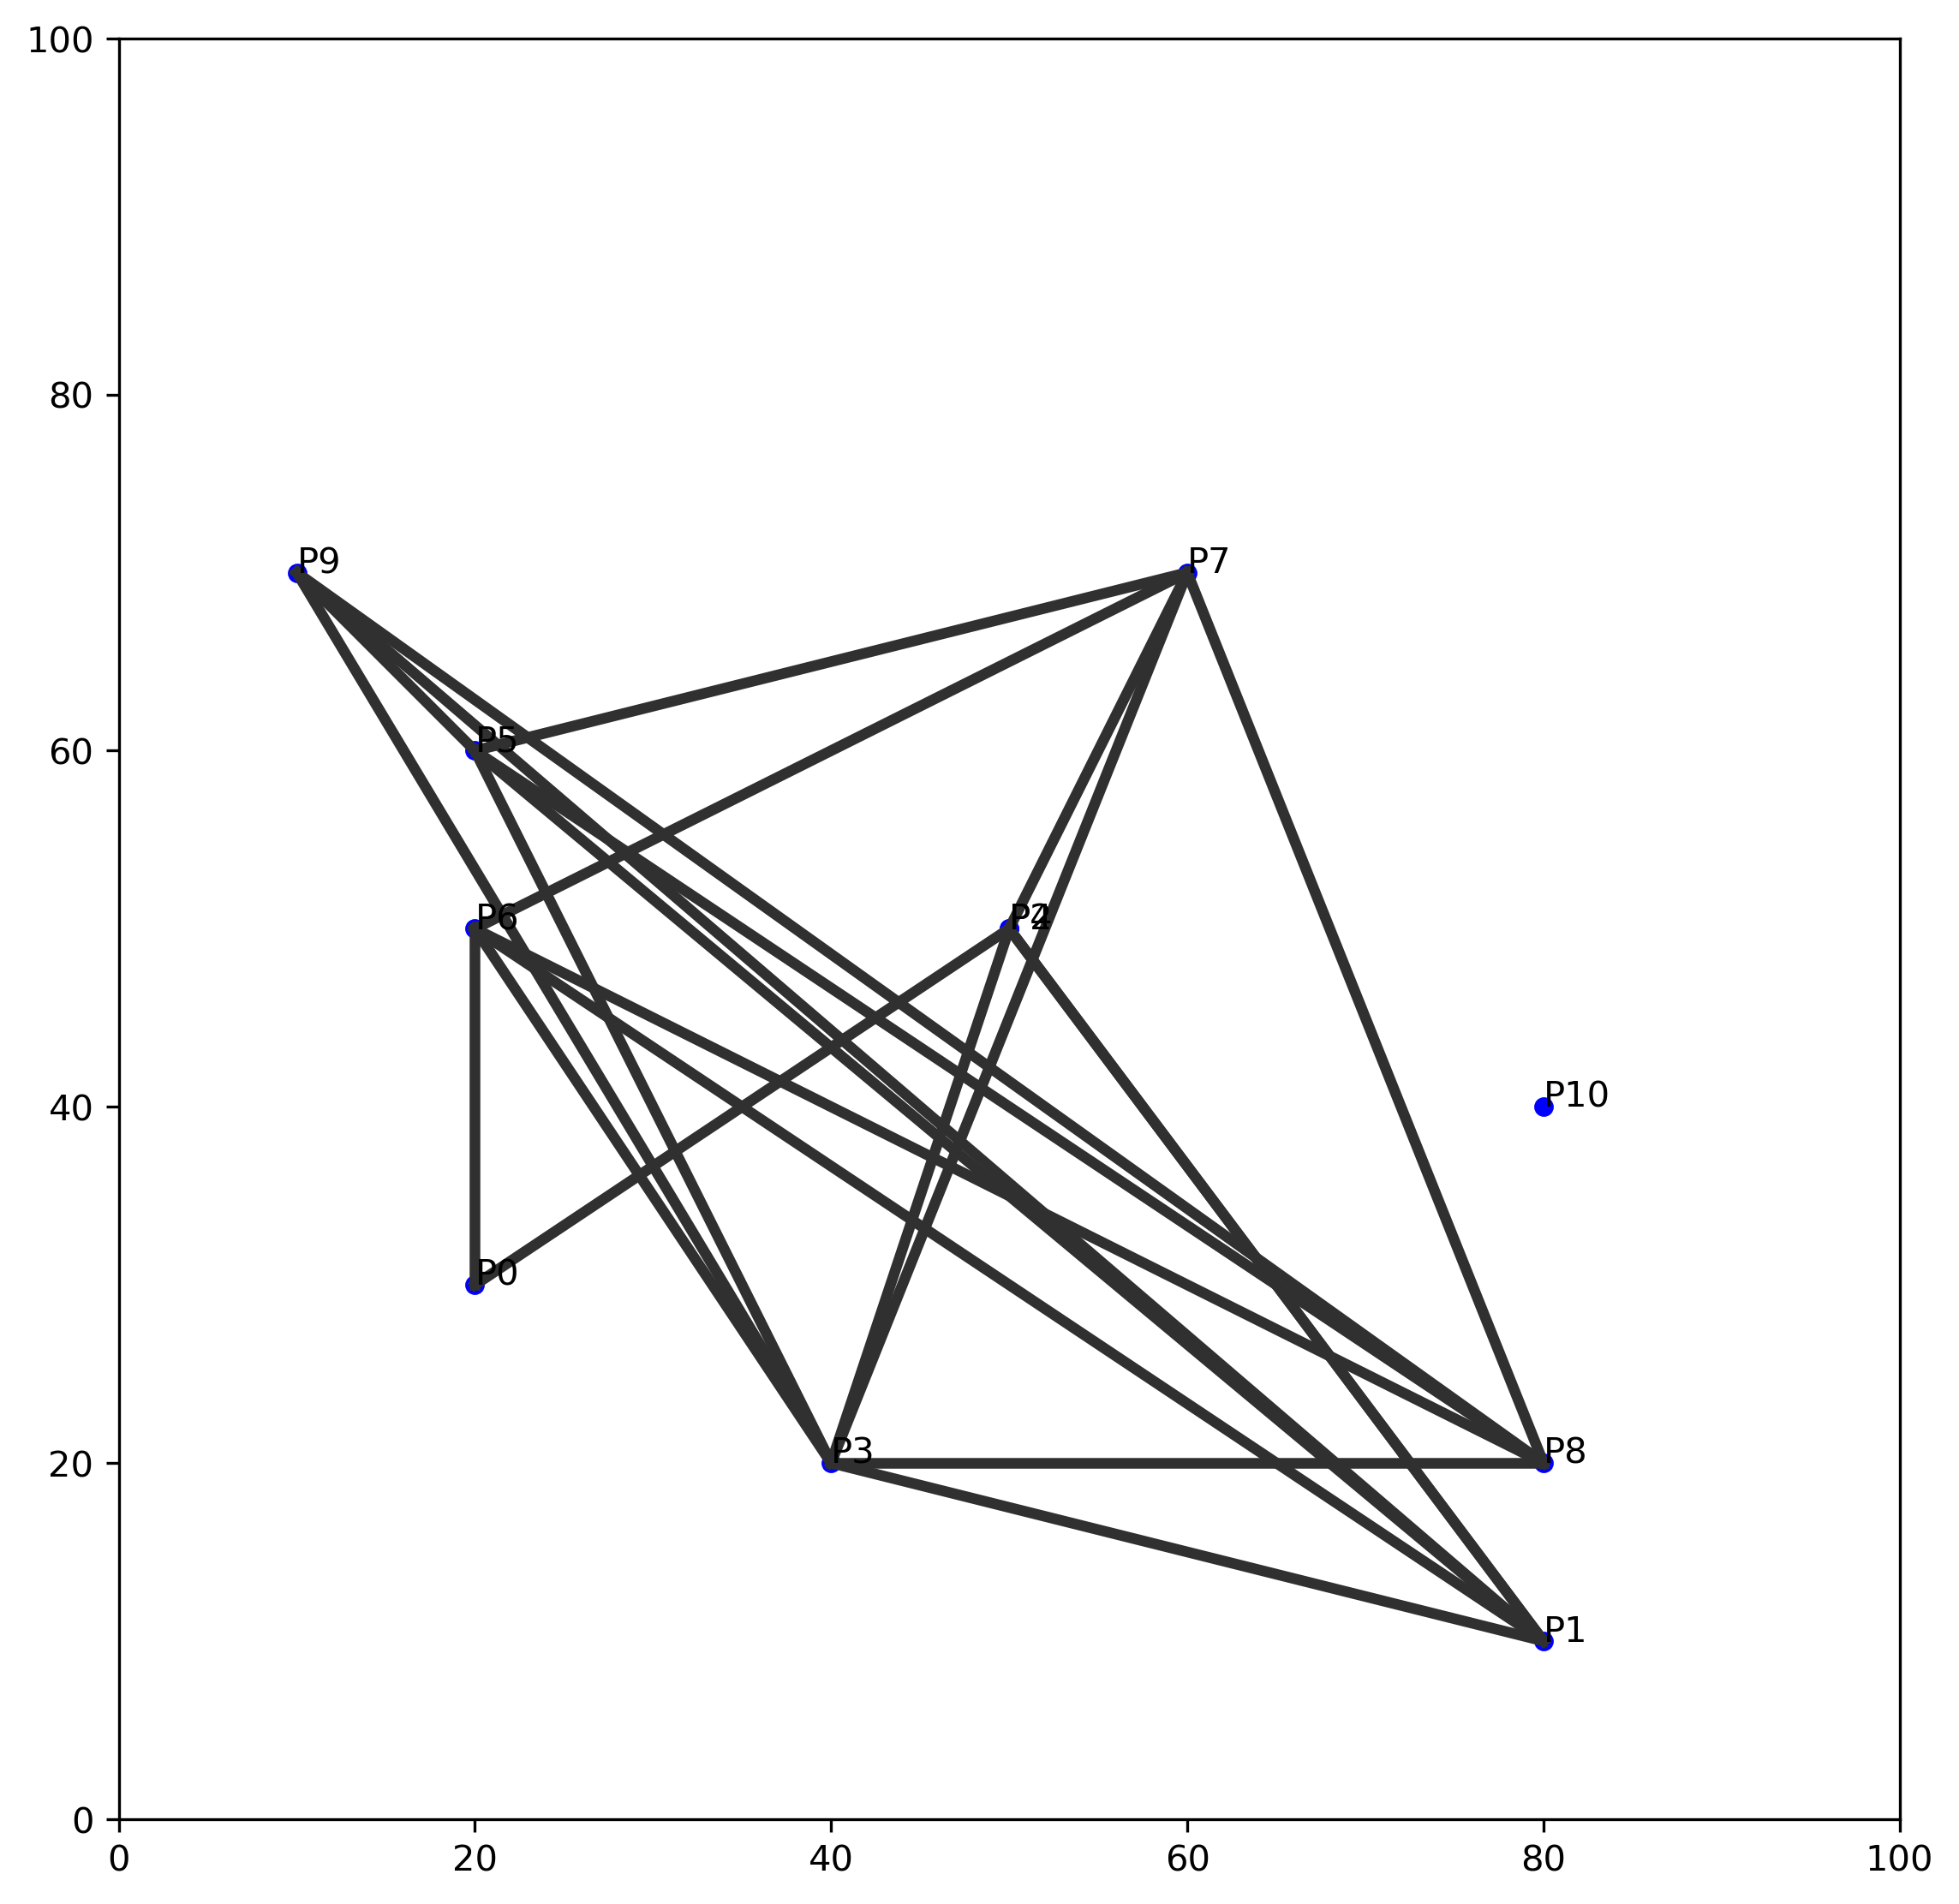">


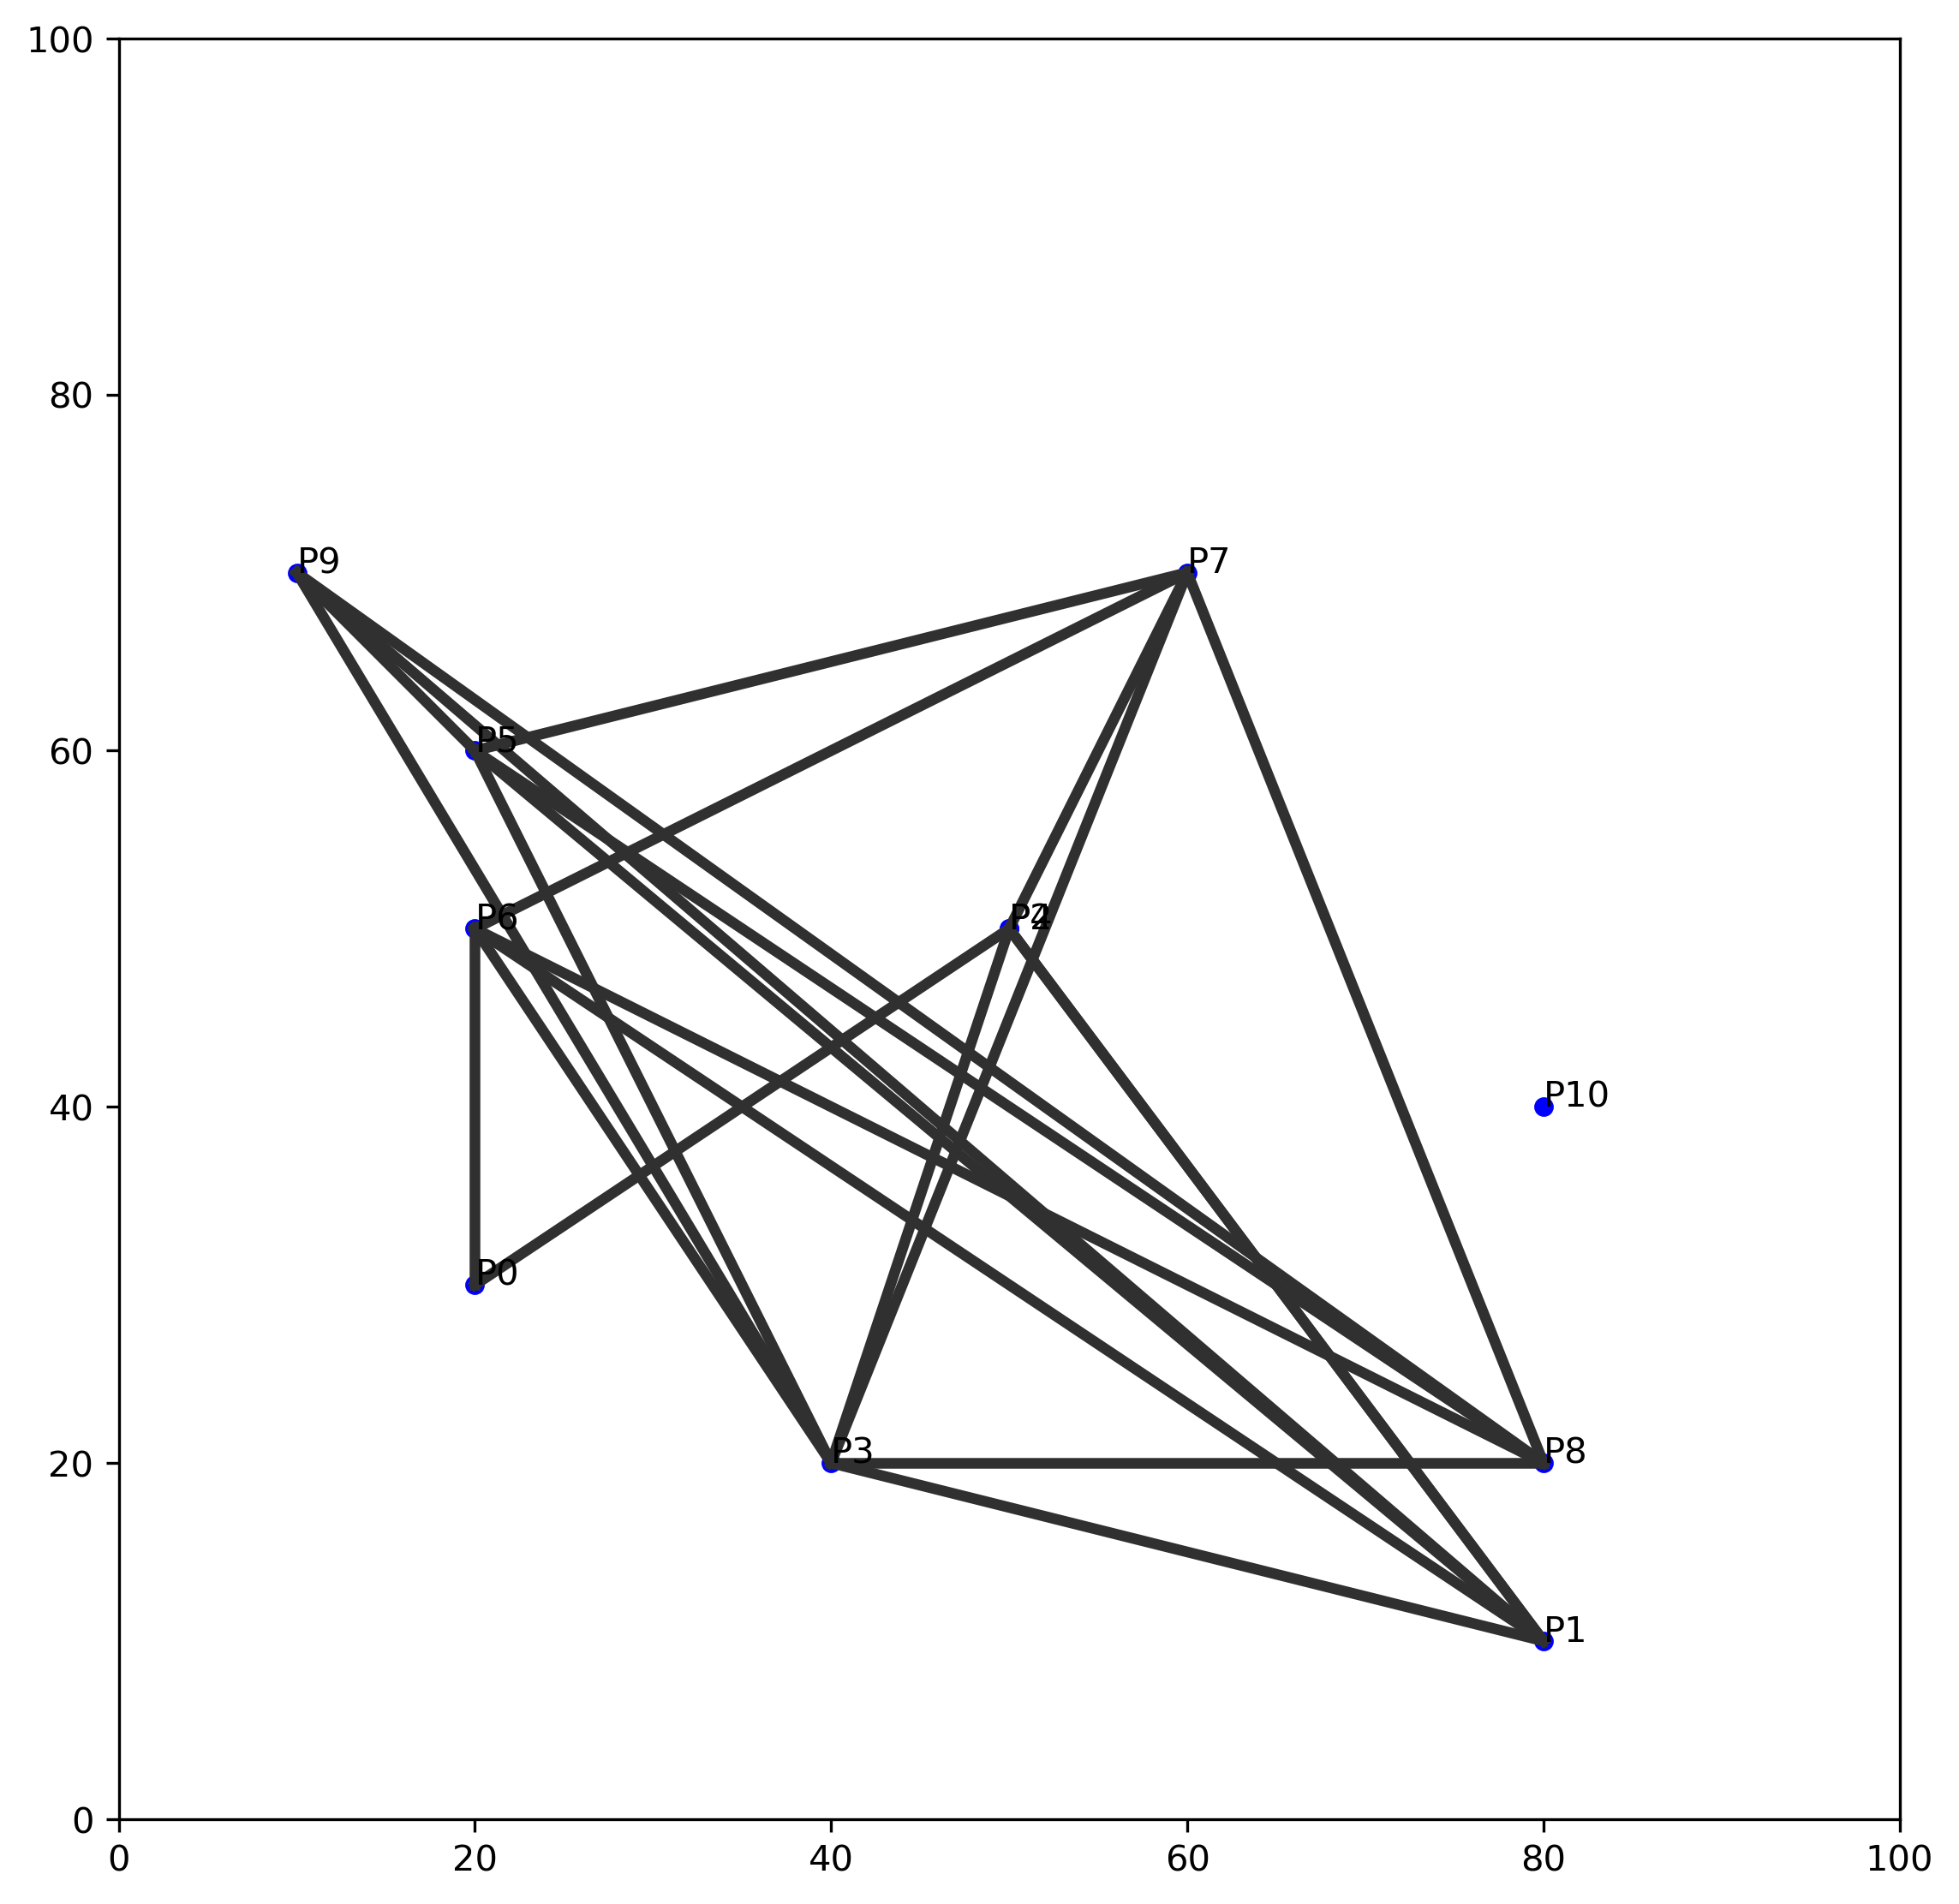

</a>


</div><!-- end of question_body -->


In [2]:

def a_star_search( initial, successor_func, is_goal_func, heur_func, node_limit = 1000, depth_limit = None, ax = None ):
    queue = [ ( initial, heur_func(initial), 0, [initial] ) ]
    num_nodes = 1
    max_queue = 0
    sol = None
    visited = [ ]
    frames = []

    #print("Search started", queue)
    while( len( queue ) > 0 ):
        # queue = queue[0:-1]
        #print("Q", queue)
        if ( len(queue) > max_queue ):
              max_queue = len(queue)
        current, current_h, current_g, chist = queue.pop()
        visited.append( current )
        if ax is not None:
          #print('visited', visited )
          frame = drawEnvironment( ax, env, visited )
          frames.append( frame )

        #print('   ' * len(chist), current, '[', chist, ']' )
        #print("Num Nodes", numNodes)
        #print( len(chist), depthLimit, printState( current ) )
        if is_goal_func( current ):
            sol = chist
            break
        if ( depth_limit is None ) or ( len(chist) <= depth_limit ):
            # print("current state", current, current_h, current_g, chist )
            # print("queue", queue)
            children = successor_func( current )
            #print("children", children)
            for child in children:
                c, cost = child
                if c not in chist:
                    #print("Add child", printState(c))
                    h = heur_func( c )
                    g = current_g + cost
                    pos = 0
                    for i in range(len(queue)-1, -1, -1 ):
                      if ( queue[i][1] + queue[i][2] >= h + g ):
                        pos = i + 1
                        break
                    queue.insert(pos, (c, h, g, chist + [c] ))
                    num_nodes = num_nodes + 1
                    if ( num_nodes > node_limit ):
                        #print("search terminated with num_nodes", num_nodes )
                        return ( num_nodes, max_queue, None )
        # else:
        #   print("Depth cutoff", len(chist), ">", depth_limit )
    return ( num_nodes, max_queue, sol, frames )



<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>Find the minimum and maximum length of a road in this map</p>

<p>The minimum length of a road is: 14.1421</p>

<p>The maximum length of a road is: 92.195</p>
</p>


<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

In [ ]:
map_points = [[20,30],[80,10],[50,50],[40,20],[50,50],[20,60],[20,50],[60,70],[80,20],[10,70],[80,40]]
map_roads = [[5,9],[3,6],[1,6],[1,3],[6,7],[5,7],[1,2],[7,8],[3,4],[3,9],[3,5],[3,8],[1,4],[5,8],[3,7],[6,8],[1,9],[1,5],[0,2],[0,6],[4,7],[8,9]]

max=0
min=9999
for roads in map_roads:     
    start_point=map_points[roads[0]]
    end_point=map_points[roads[1]]
    dis =((start_point[0]-end_point[0])**2+(start_point[1]-end_point[1])**2)**0.5
    if dis>max:
        max=dis
    if dis<min:
        min=dis

print(f'max: {max}')
print(f'min: {min}')


<!-- </div> --><!-- end of question_frame -->


<!-- <div class="question_frame"> --><!-- start of question_frame -->



<h1>Map Navigation - A* Search</h1>
<div class="question_body">

<p>
Show a trace of the A* search algorithm using the <span class="important">Euclidean distance</span> as a heuristic function.
</p>

<p>You start at city P1 and finish at city P8</p>

</div><!-- end of question_body -->



<div class="question_marks">
<span class="mark_num" style="text-align:right">15</span> marks
</div><!-- end of question_marks -->



<code>
<pre>f
Trace of A* Search from P1 to P8
P1 h=10.00, g=0
ENTER YOUR TRACE HERE
</pre>
</code>


<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

In [1]:
map_points = [[20,30],[80,10],[50,50],[40,20],[50,50],[20,60],[20,50],[60,70],[80,20],[10,70],[80,40]]
map_roads = [[5,9],[3,6],[1,6],[1,3],[6,7],[5,7],[1,2],[7,8],[3,4],[3,9],[3,5],[3,8],[1,4],[5,8],[3,7],[6,8],[1,9],[1,5],[0,2],[0,6],[4,7],[8,9]]

def generate_neighborn(table,table_title,item):
    index=table_title.index(item)
    neighbor=[]
    for lotus in table[index]:
        if(lotus!=[]):
            neighbor+=[lotus]
                
    return  neighbor

table=[]

for x in range(0,len(map_points)):    #make path table
    stap=[]
    for _ in range(0,len(map_points)):
        stap+=[[]]
    for y in range(0,len(map_roads)):
        if map_roads[y][0]==x :
            index=map_roads[y][1]
            stap[index]=map_points[index]
        
        if map_roads[y][1]==x :
            index=map_roads[y][0]
            stap[index]=map_points[index]
    table+=[stap]

print("%-10s"%" ",end="")

for x in map_points:
    print("%-10s"%str(x),end="")
print()
for y in range(0,len(table)):
    print("%-10s"%str(map_points[y]),end="")
    for x in range(0,len(table)):
        print("%-10s"%str(table[y][x]),end="")
    print()

lock_list=[]
from_list=[]
distance_list=[]

for lt in map_points:   #lock distance from list
    if(lt==[80,10]):
        lock_list+=[False]
        from_list+=[[-1,-1]]
        distance_list+=[0]
    else:
        lock_list+=[False]
        from_list+=[[]]
        distance_list+=[-1]


for _ in range(0,10):
    index=0
    min=max(distance_list)

    end=True
    for seq in range(0,len(distance_list)):
        if distance_list[seq]<=min and not(lock_list[seq]) and distance_list[seq]!=-1:
            index=seq
            min=distance_list[seq]
            end=False

            
    if(end):
        break

    now = map_points[index]
    lock_list[index] = True
    neighborn=generate_neighborn(table,map_points,now)
        
    for member in neighborn:
                
        now_id=map_points.index(now)
        member_id=map_points.index(member)
        if not(lock_list[member_id]):
            od=distance_list[now_id]
            dis=((member[0]-now[0])**2+(member[1]-now[1])**2)**0.5         
            distance_list[member_id]=od+dis
            from_list[member_id]=now

goal=[80,20]
path=[]

while goal!=[-1,-1]:
    path+=[goal]
    index=map_points.index(goal)
    goal=from_list[index]

path=list(reversed(path))
print(f'P1 to P8 path {path}')

          [20, 30]  [80, 10]  [50, 50]  [40, 20]  [50, 50]  [20, 60]  [20, 50]  [60, 70]  [80, 20]  [10, 70]  [80, 40]  
[20, 30]  []        []        [50, 50]  []        []        []        [20, 50]  []        []        []        []        
[80, 10]  []        []        [50, 50]  [40, 20]  [50, 50]  [20, 60]  [20, 50]  []        []        [10, 70]  []        
[50, 50]  [20, 30]  [80, 10]  []        []        []        []        []        []        []        []        []        
[40, 20]  []        [80, 10]  []        []        [50, 50]  [20, 60]  [20, 50]  [60, 70]  [80, 20]  [10, 70]  []        
[50, 50]  []        [80, 10]  []        [40, 20]  []        []        []        [60, 70]  []        []        []        
[20, 60]  []        [80, 10]  []        [40, 20]  []        []        []        [60, 70]  [80, 20]  [10, 70]  []        
[20, 50]  [20, 30]  [80, 10]  []        [40, 20]  []        []        []        [60, 70]  [80, 20]  []        []        
[60, 70]  []        []        []

<!-- </div> --><!-- end of question_frame -->
